In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Carga del dataset

In [5]:
datos= pd.read_csv("online_shoppers_intention.csv")

In [6]:
datos.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1.0,1.0,1.0,1.0,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2.0,2.0,1.0,2.0,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4.0,1.0,9.0,3.0,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3.0,2.0,2.0,4.0,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3.0,3.0,1.0,4.0,Returning_Visitor,True,False


EDA

In [8]:
datos.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12067.000000,12067.000000,12067.000000,12067.000000,12067.000000,12067.000000,12066.000000,12066.000000,12066.000000,12066.000000,12066.000000,12066.000000,12066.000000,12066.000000
mean,2.313582,80.525445,0.499959,34.367431,31.533521,1186.276399,0.022252,0.043125,5.855664,0.062771,2.118432,2.348914,3.147273,4.061909
std,3.317367,176.022683,1.259302,141.090797,44.278528,1909.130111,0.048574,0.048689,18.463866,0.200872,0.899959,1.692162,2.397493,4.004295
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,183.214286,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.625000,0.000000,0.000000,18.000000,595.000000,0.003077,0.025109,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,92.966667,0.000000,0.000000,37.500000,1459.276429,0.016928,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [9]:
datos.shape

(12067, 18)

In [10]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12067 entries, 0 to 12066
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12067 non-null  int64  
 1   Administrative_Duration  12067 non-null  float64
 2   Informational            12067 non-null  int64  
 3   Informational_Duration   12067 non-null  float64
 4   ProductRelated           12067 non-null  int64  
 5   ProductRelated_Duration  12067 non-null  float64
 6   BounceRates              12066 non-null  float64
 7   ExitRates                12066 non-null  float64
 8   PageValues               12066 non-null  float64
 9   SpecialDay               12066 non-null  float64
 10  Month                    12066 non-null  object 
 11  OperatingSystems         12066 non-null  float64
 12  Browser                  12066 non-null  float64
 13  Region                   12066 non-null  float64
 14  TrafficType           

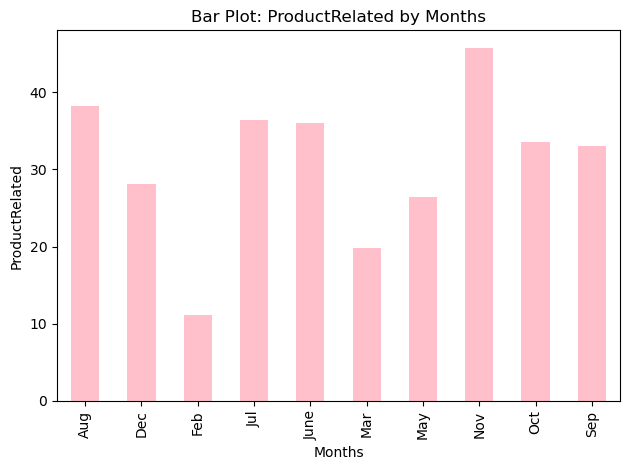

In [11]:
plt.figure()
datos.groupby("Month")["ProductRelated"].mean().plot(kind="bar", color="pink")
plt.xlabel("Months")
plt.ylabel("ProductRelated")
plt.title("Bar Plot: ProductRelated by Months")
plt.tight_layout()
plt.show()

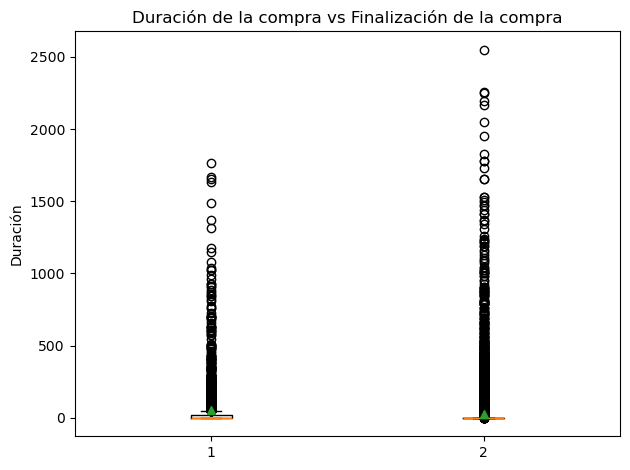

In [12]:
datos["Revenue"] = datos["Revenue"].astype(str).str.lower().str.strip()  # "true"/"false"

# Extraer los datos para cada categoría
comprasS = datos[datos["Revenue"] == "true"]["Informational_Duration"].dropna()
comprasN  = datos[datos["Revenue"] == "false"]["Informational_Duration"].dropna()
#comprasS = datos[datos["Revenue"] == "TRUE"]["Month"]
#comprasN = datos[datos["Revenue"] == "FALSE"]["Month"]

plt.figure()
plt.boxplot([comprasS, comprasN], showmeans=True)
plt.ylabel("Duración")
plt.title("Duración de la compra vs Finalización de la compra")
plt.tight_layout()
plt.show()

## Este mapa de calor, correlación entre las variables numéricas.
Los valores cercanos a 1 indican una relación positiva fuerte; los valores cercanos a -1 una relación negativa fuerte.


PageValues y Revenue están altamente relacionados, lo cual confirma su importancia para predecir compra.

BounceRates y ExitRates tienen correlación moderada, lo que es lógico porque ambas miden abandono.

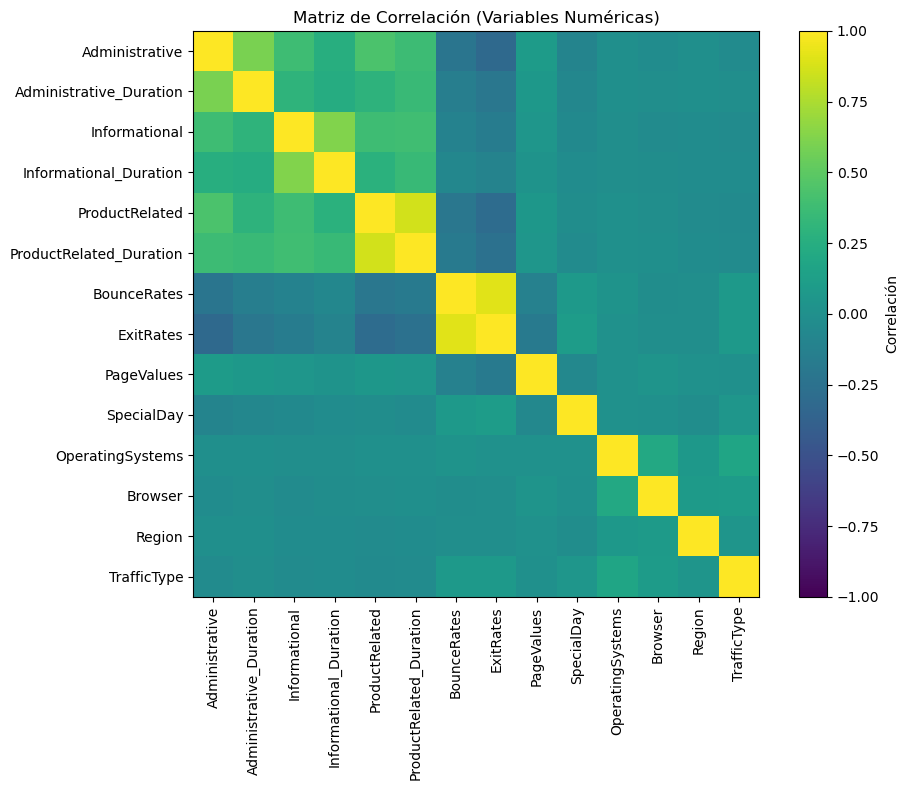

In [19]:

plt.figure(figsize=(12,10))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Matriz de correlación variables numéricas")
plt.show()


## Los navegadores utilizados para acceder a la página: 
Este gráfico nos ayuda a conocer qué browsers son los más utilizados por los usuarios, para ayudarnos a tomar la decisión de en cuales hace falta una mayor promoción.

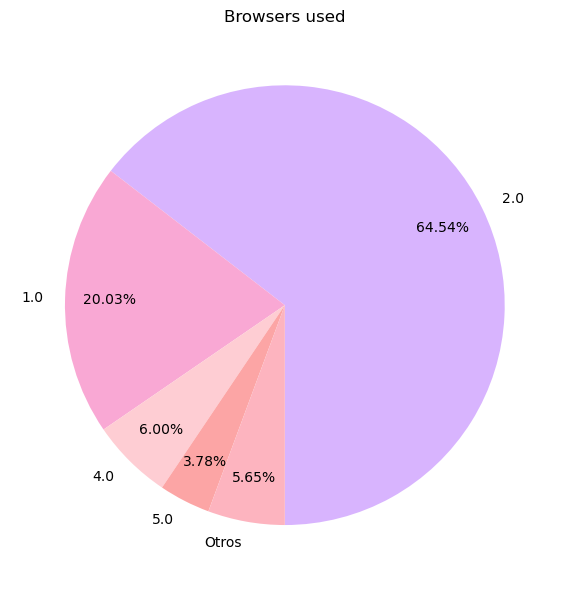

In [14]:
tipo = num_df["Browser"].value_counts()

umbral = 0.02
tipo_rel = tipo / tipo.sum()

otros = tipo_rel[tipo_rel < umbral].sum()
tipo_clean = tipo_rel[tipo_rel >= umbral]

if otros > 0:
    tipo_clean["Otros"] = otros

plt.figure(figsize=(6,6))

colores_pastel = [
    "#d8b4fe",
    "#f9a8d4",
    "#fecdd3", 
    "#fca5a5",
    "#fdb4bf"   
]

plt.pie(
    tipo_clean,
    labels=tipo_clean.index,
    autopct='%1.2f%%',
    startangle=-450,
    pctdistance=0.8,
    labeldistance=1.1,
    colors=colores_pastel[:len(tipo_clean)]
)

plt.title("Browsers used")
plt.tight_layout()
plt.show()

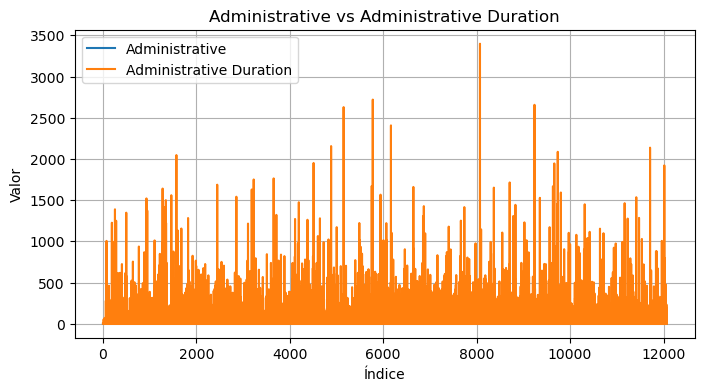

In [15]:

plt.figure(figsize=(8, 4))
plt.plot(datos["Administrative"], label="Administrative")
plt.plot(datos["Administrative_Duration"], label="Administrative Duration")
plt.xlabel("Índice")
plt.ylabel("Valor")
plt.title("Administrative vs Administrative Duration")
plt.legend()
plt.grid()
plt.show()



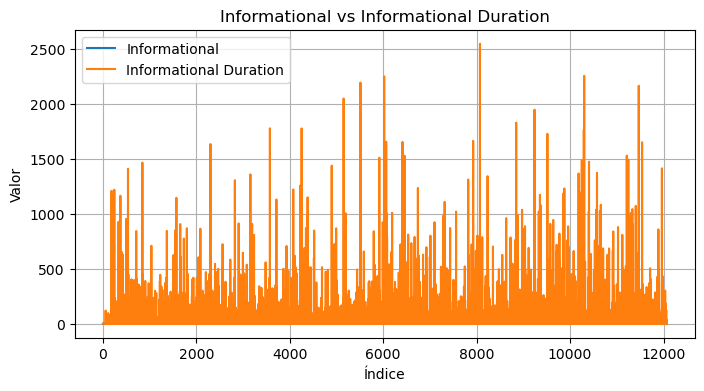

In [16]:
plt.figure(figsize=(8, 4))
plt.plot(datos["Informational"], label="Informational")
plt.plot(datos["Informational_Duration"], label="Informational Duration")
plt.xlabel("Índice")
plt.ylabel("Valor")
plt.title("Informational vs Informational Duration")
plt.legend()
plt.grid()
plt.show()


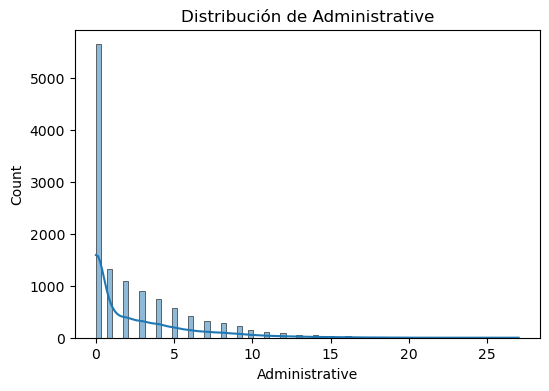

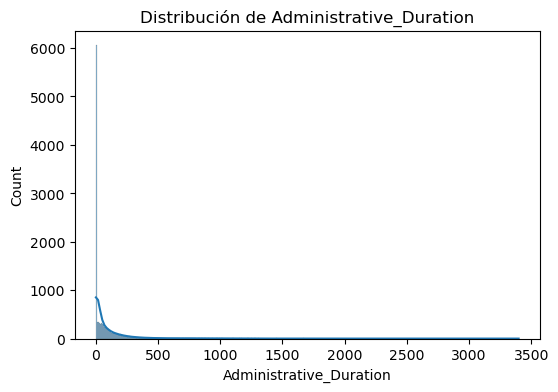

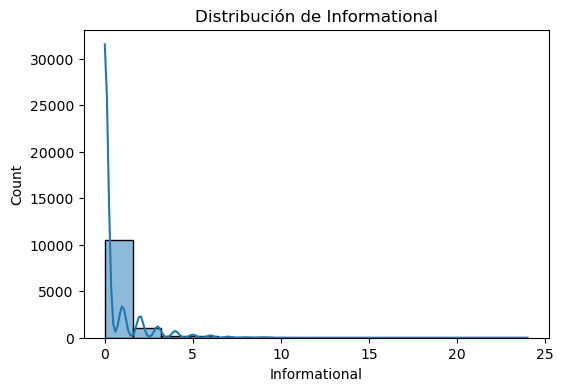

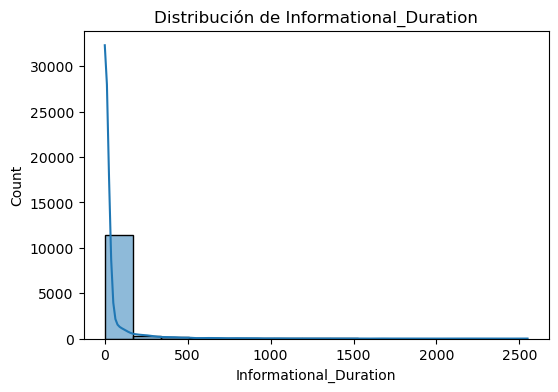

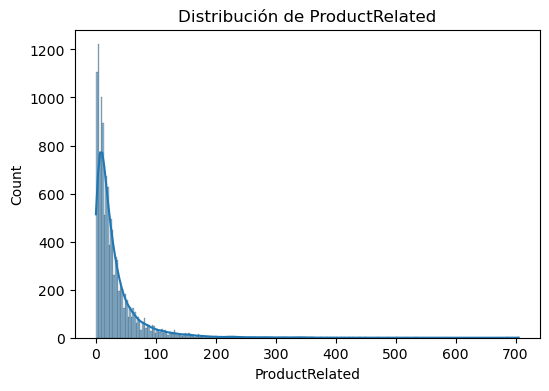

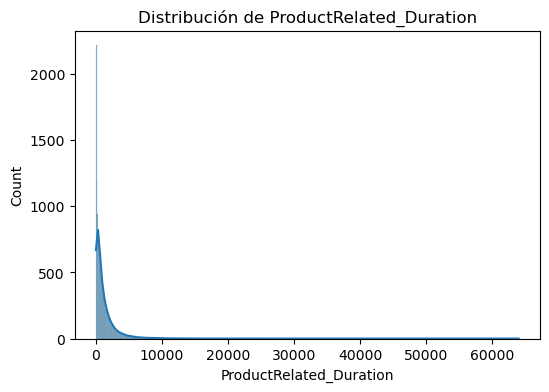

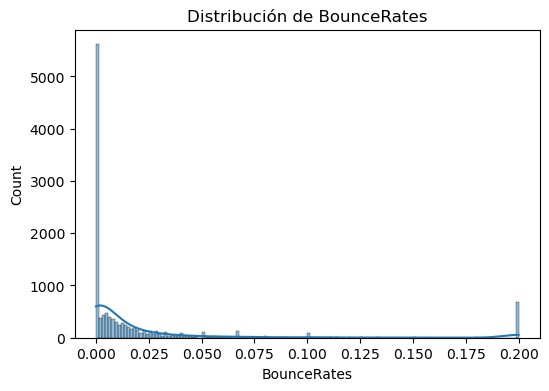

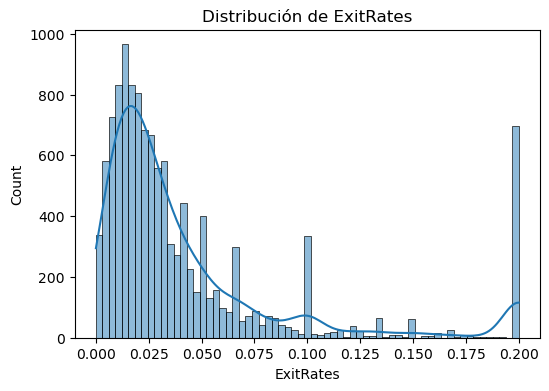

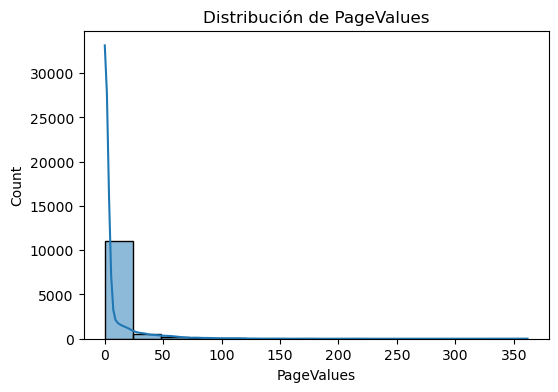

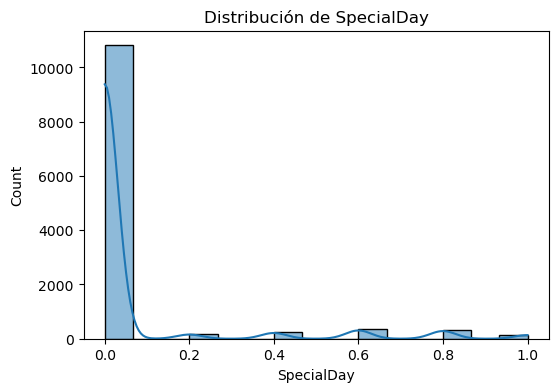

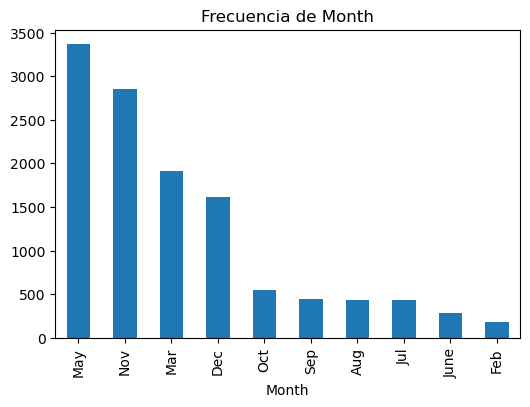

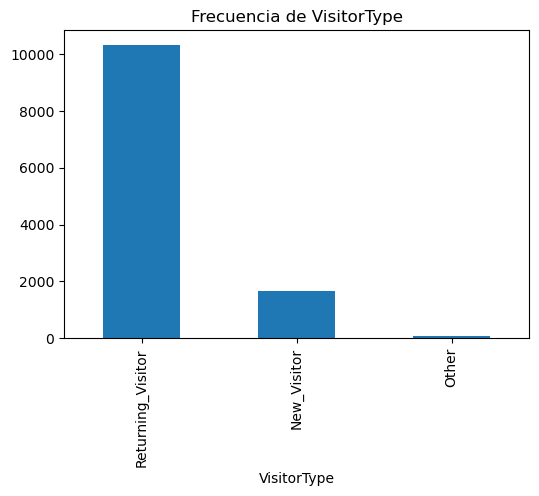

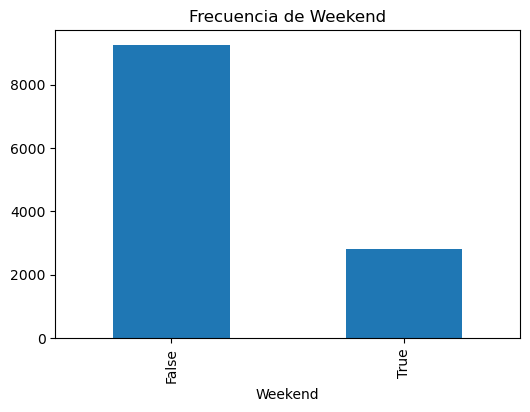

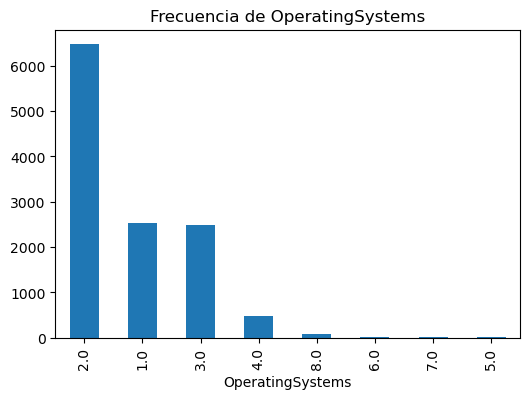

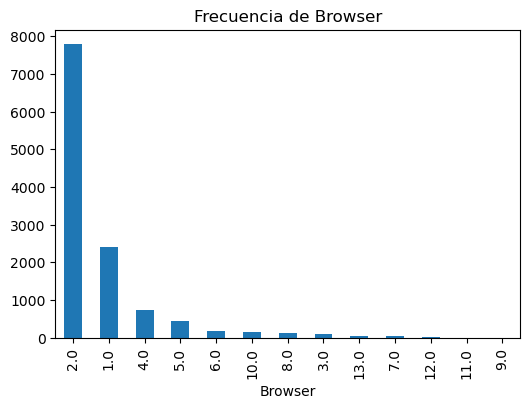

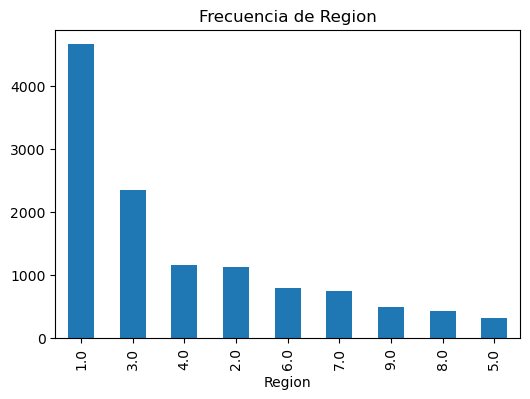

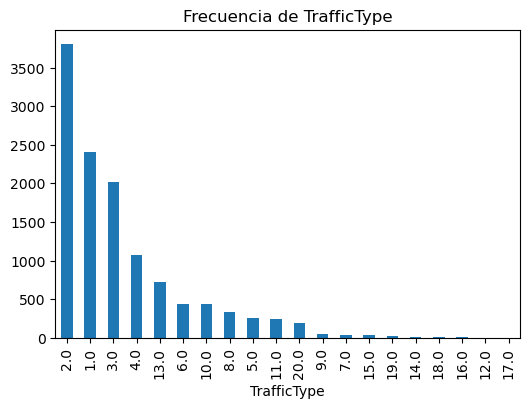

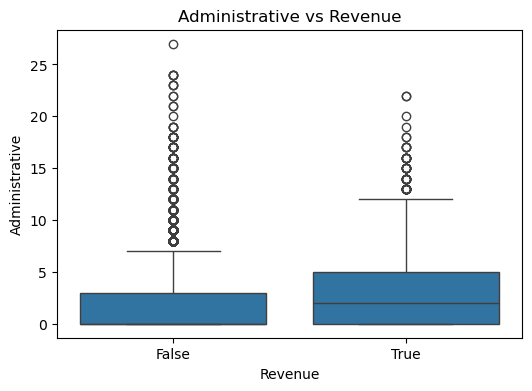

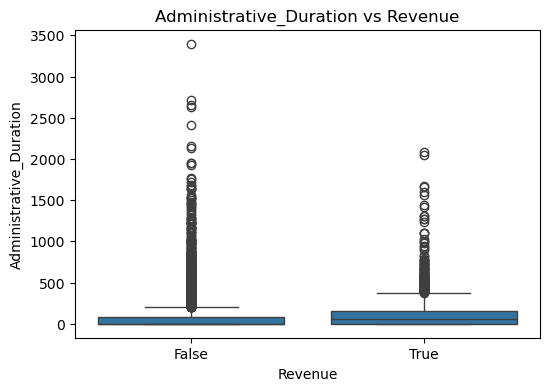

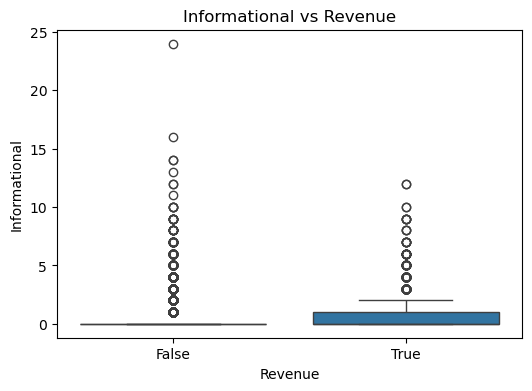

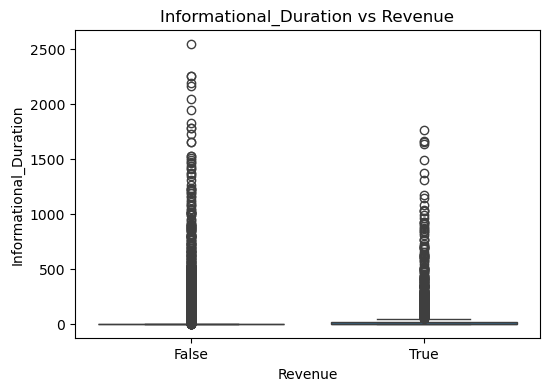

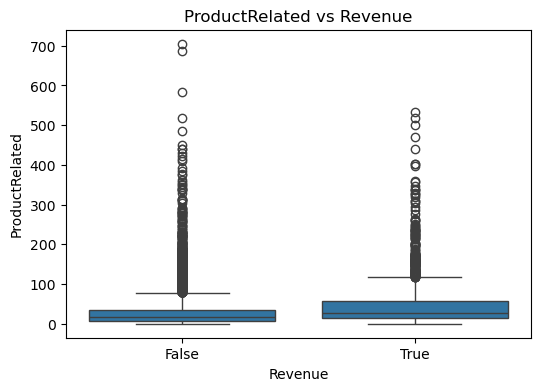

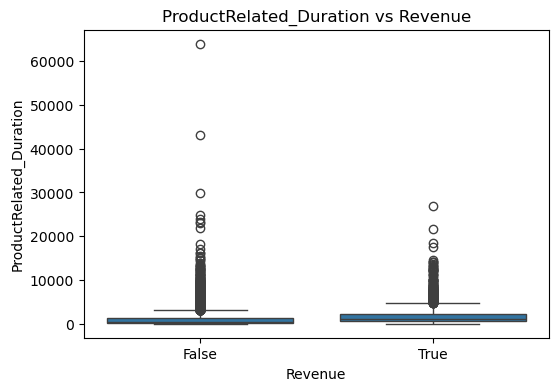

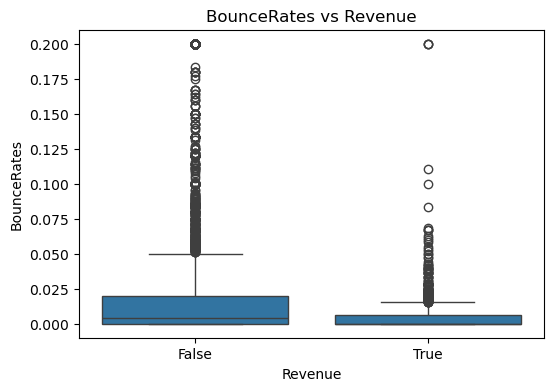

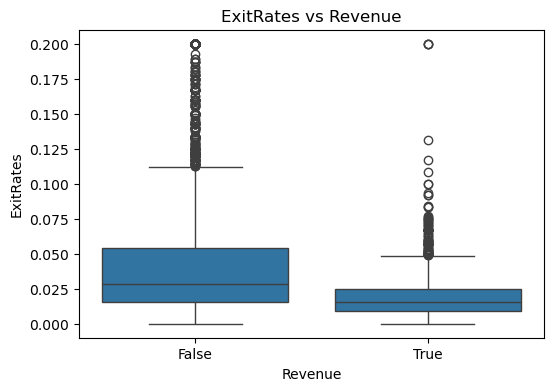

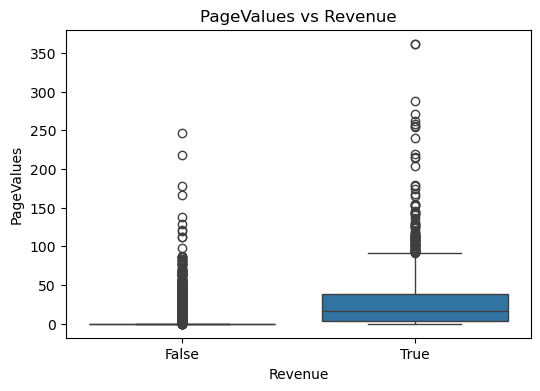

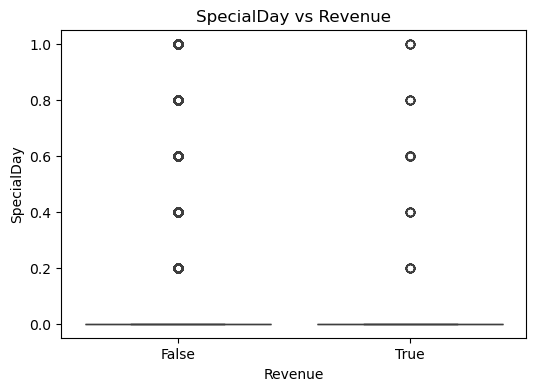

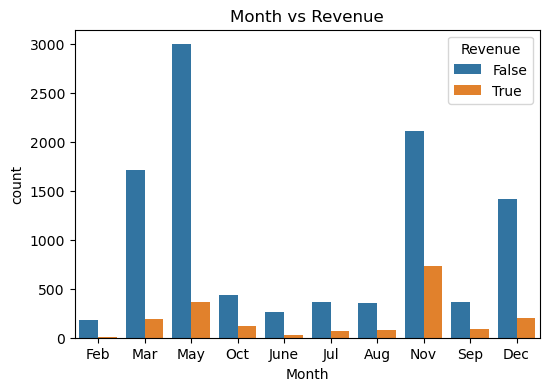

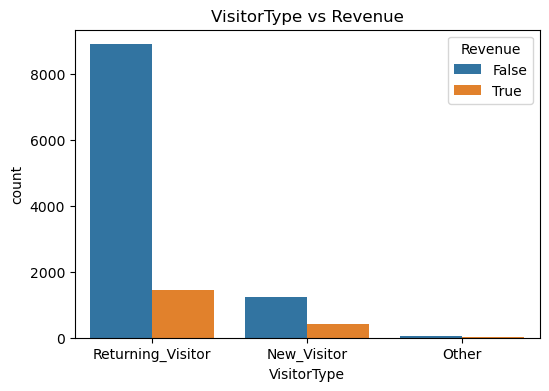

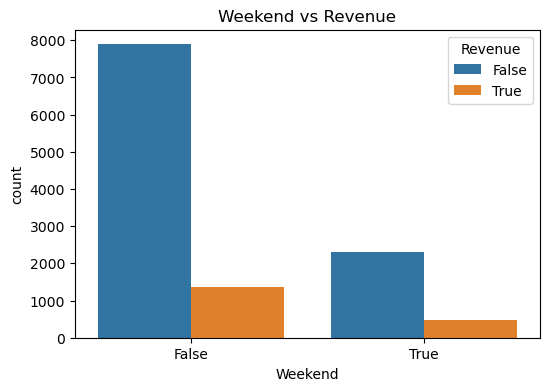

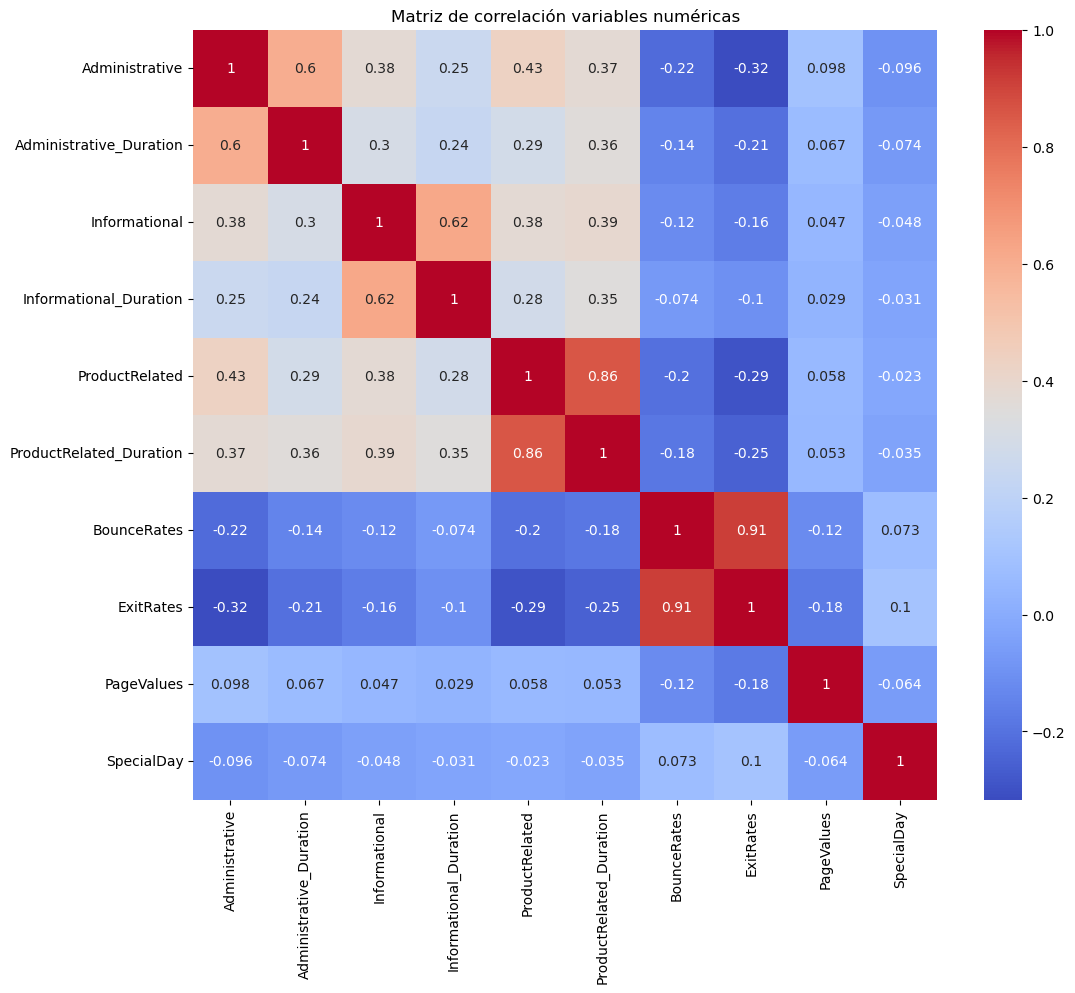

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("online_shoppers_intention.csv")

# ============================================
# 1. DISTRIBUCIÓN DE VARIABLES NUMÉRICAS
# ============================================

numeric_cols = [
    'Administrative', 'Administrative_Duration',
    'Informational', 'Informational_Duration',
    'ProductRelated', 'ProductRelated_Duration',
    'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay'
]

for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribución de {col}")
    plt.show()

# ============================================
# 2. FRECUENCIAS DE VARIABLES CATEGÓRICAS
# ============================================

categorical_cols = [
    'Month', 'VisitorType', 'Weekend', 'OperatingSystems',
    'Browser', 'Region', 'TrafficType'
]

for col in categorical_cols:
    plt.figure(figsize=(6,4))
    df[col].value_counts().plot(kind="bar")
    plt.title(f"Frecuencia de {col}")
    plt.show()

# ============================================
# 3. RELACIÓN ENTRE VARIABLES Y REVENUE
# ============================================

for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x="Revenue", y=col, data=df)
    plt.title(f"{col} vs Revenue")
    plt.show()

cat_for_revenue = ['Month', 'VisitorType', 'Weekend']
for col in cat_for_revenue:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, hue="Revenue", data=df)
    plt.title(f"{col} vs Revenue")
    plt.show()

# ============================================
# 4. MATRIZ DE CORRELACIÓN
# ============================================

